# linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
AlkaliLoadData = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/alkaliData.csv", encoding='unicode_escape')
AlkaliLoadData.head()

,Na2O%,Ms,W/B,SA (m²/kg),Kb,28d
0,4.0,0.75,0.47,527,0.96,43.80
1,4.0,1.00,0.47,527,0.96,48.96
2,4.0,1.50,0.47,527,0.96,48.05
3,4.0,2.00,0.47,527,0.96,33.44
4,6.0,0.75,0.47,527,0.96,46.71


In [3]:
AlkaliLoadData.isnull().sum()

Na2O%         0
Ms            0
W/B           0
SA (m²/kg)    0
Kb            0
28d           0
dtype: int64

In [4]:
X= AlkaliLoadData.drop(columns='28d')
Y = AlkaliLoadData['28d']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [7]:
Y_pred_test= lr.predict(X_test) 

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
linear_mse= mean_squared_error(Y_test, Y_pred_test)
print('mean sq error ', linear_mse)

mean sq error  615.9659862509789


In [9]:
from sklearn.metrics import mean_absolute_error
linear_mae= mean_absolute_error(Y_test, Y_pred_test)
mape_lg = np.mean(np.abs((Y_test - Y_pred_test)/Y_test))*100
print('mean absolute error is ', linear_mae)
print('mean absolute percent error is ', mape_lg)

mean absolute error is  18.422998762802095
mean absolute percent error is  36.15291943875996


In [10]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_test)

0.05043486551714493

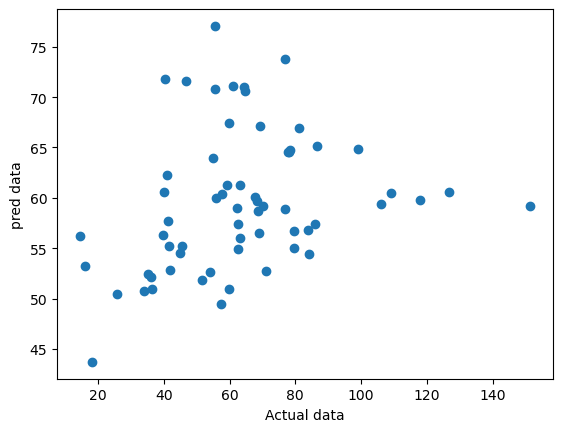

In [11]:
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()

# Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
regression = LinearRegression()
regression.fit(X_train_poly, Y_train)
Y_pred_test_poly= regression.predict(X_test_poly)

In [14]:
poly_mse= mean_squared_error(Y_test, Y_pred_test_poly)
print('mean sq error ', poly_mse)

mean sq error  469.5332160024067


In [15]:
poly_mae= mean_absolute_error(Y_test, Y_pred_test_poly)
mape_po = np.mean(np.abs((Y_test - Y_pred_test_poly)/Y_test))*100
print('mean absolute error is ', poly_mae)
print('mean absolute percent error is ', mape_po)

mean absolute error is  14.523179980128285
mean absolute percent error is  30.528895346314442


In [16]:
r2_score(Y_test, Y_pred_test_poly)

0.2761737151898065

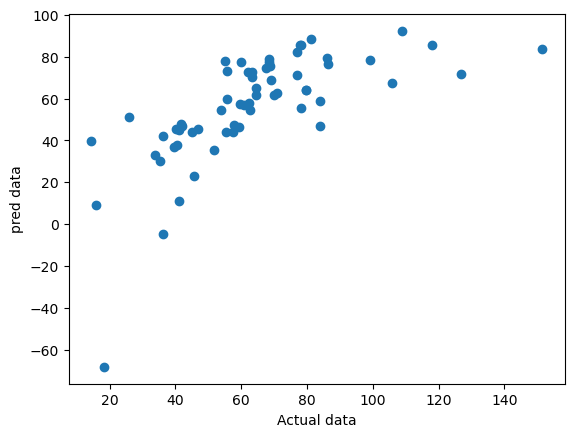

In [17]:
plt.scatter(Y_test, Y_pred_test_poly)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()

# Neural Network

In [44]:
from tensorflow.keras import Sequential
from keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [46]:
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [47]:
model = Sequential()
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import BatchNormalization
model.add(Dense(5, activation = 'selu'))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(64, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(32, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(16, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(8, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(4, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(2, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(1, activation = 'selu',kernel_initializer=glorot_normal()))

In [48]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [49]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 45ms/step - loss: 4094.9934 - mae: 58.3545 - val_loss: 3818.2903 - val_mae: 56.6782
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 4015.3564 - mae: 57.6689 - val_loss: 3768.5747 - val_mae: 56.2363
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 3965.1355 - mae: 57.2337 - val_loss: 3719.0181 - val_mae: 55.7950
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 3910.7075 - mae: 56.7697 - val_loss: 3664.4785 - val_mae: 55.3044
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 3849.5295 - mae: 56.2339 - val_loss: 3600.7012 - val_mae: 54.7220
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 3775.8657 - mae: 55.5915 - val_loss: 3517.6313 - val_mae: 53.9572
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 3681.7268 - mae: 54.7395 - val_loss: 3398.5986 - val_mae: 52.8482
Epoch 8/100
7/7 [=======================

7/7 [==============================] - 0s 8ms/step - loss: 502.3896 - mae: 16.7833 - val_loss: 589.6815 - val_mae: 19.2487
Epoch 62/100
7/7 [==============================] - 0s 8ms/step - loss: 478.0772 - mae: 16.8212 - val_loss: 592.0079 - val_mae: 19.3599
Epoch 63/100
7/7 [==============================] - 0s 8ms/step - loss: 464.6352 - mae: 16.2343 - val_loss: 585.5626 - val_mae: 19.1288
Epoch 64/100
7/7 [==============================] - 0s 7ms/step - loss: 495.9849 - mae: 16.7997 - val_loss: 585.8004 - val_mae: 18.9359
Epoch 65/100
7/7 [==============================] - 0s 9ms/step - loss: 470.4777 - mae: 16.4128 - val_loss: 583.8706 - val_mae: 18.8742
Epoch 66/100
7/7 [==============================] - 0s 8ms/step - loss: 487.7942 - mae: 16.5234 - val_loss: 578.3832 - val_mae: 18.8458
Epoch 67/100
7/7 [==============================] - 0s 8ms/step - loss: 479.8207 - mae: 16.5392 - val_loss: 585.8728 - val_mae: 19.4014
Epoch 68/100
7/7 [==============================] - 0s 8ms/st

In [50]:
y_pred_neural = model.predict(X_test_scaled)

2/2 [==============================] - 0s 4ms/step


In [51]:
mse_neural= mean_squared_error(Y_test, y_pred_neural)
print('mean sq error ', mse_neural)

mean sq error  439.2756279927572


In [52]:
neural_mae= mean_absolute_error(Y_test, y_pred_neural)
mape_nu = mean_absolute_percentage_error(Y_test, y_pred_neural)
    

print('mean absolute error is ', neural_mae)
print('mean absolute percent error is ', mape_nu*100)

mean absolute error is  14.410020152061216
mean absolute percent error is  22.953968527797898


In [53]:
r2_score(Y_test, y_pred_neural)

0.32281841841827796

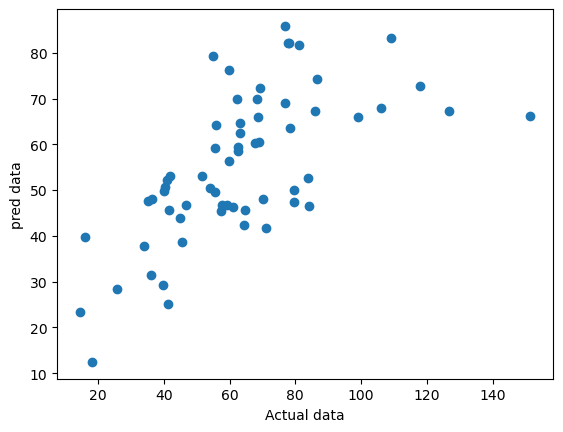

In [54]:
plt.scatter(Y_test, y_pred_neural)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()

# XGBoost

In [55]:
from  xgboost import XGBRegressor

In [56]:
xgbr = XGBRegressor(verbosity=0,learning_rate=0.5,n_estimators=50,max_depth=6,min_child_weight=4)

In [57]:
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
Yp=xgbr.predict(X_test)
mse_xgboost= mean_squared_error(Y_test, Yp)
print('mean sq error ', mse_xgboost)

mean sq error  115.92043421164789


In [59]:
from sklearn.metrics import mean_absolute_percentage_error
xgboost_mae= mean_absolute_error(Y_test, Yp)
mape_xg = np.mean(np.abs((Y_test - Yp)/Y_test))*100
    

print('mean absolute error is ', xgboost_mae)
print('mean absolute percent error is ', mape_xg)



mean absolute error is  7.322312737126504
mean absolute percent error is  13.680557824098077


In [60]:
r2_score(Y_test, Yp)

0.8212985697936832

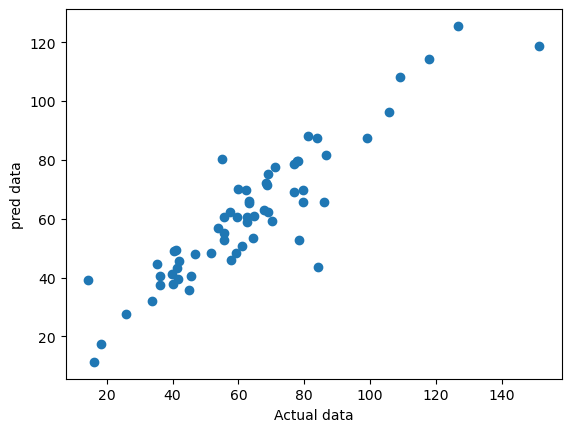

In [61]:
plt.scatter(Y_test, Yp)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()